In [1]:
from ml.EnsembleLearning import BaggingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle

In [2]:
column_name = [
    'age', 'job', 'marital', 'education', 'default',
    'balance', 'housing', 'loan', 'contact',
    'day', 'month', 'duration', 'campaign',
    'pdays', 'previous', 'poutcome', 'label',
]
df = pd.read_csv('./data/bank/train.csv', names=column_name)
df['label'] = df['label'].map({'yes': 1, 'no':-1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,41,services,married,secondary,no,0,yes,no,unknown,5,may,114,2,-1,0,unknown,-1
1,48,blue-collar,single,secondary,no,312,yes,yes,cellular,3,feb,369,2,-1,0,unknown,-1
2,55,technician,married,secondary,no,1938,no,yes,cellular,18,aug,193,1,386,3,success,1
3,54,admin.,married,tertiary,no,59,yes,no,cellular,10,jul,268,1,-1,0,unknown,-1
4,34,management,single,tertiary,no,2646,no,no,cellular,14,apr,142,1,-1,0,unknown,1


In [3]:
df_test = pd.read_csv('./data/bank/test.csv', names=column_name)
df_test['label'] = df_test['label'].map({'yes': 1, 'no':-1})
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,41,management,single,secondary,no,764,no,no,cellular,12,jun,230,2,-1,0,unknown,-1
1,39,blue-collar,married,secondary,no,49,yes,no,cellular,14,may,566,1,370,2,failure,-1
2,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown,-1
3,31,entrepreneur,single,tertiary,no,247,yes,yes,unknown,2,jun,273,1,-1,0,unknown,-1
4,26,student,single,unknown,no,2020,no,no,telephone,28,jan,42,3,-1,0,unknown,-1


In [4]:
numerical_attributes = {
    'age': 'median',
    'balance': 'median',
    'day': 'median',
    'duration': 'median',
    'campaign': 'median',
    'pdays': 'median',
    'previous': 'median',
}

In [5]:
T = 500
model = BaggingClassifier()
start = time.time()
model.fit(df, numerical_attributes=numerical_attributes, T=T, label='label')
print(f'Time to execute: {time.time() - start}s')

Time to execute: 9556.955147981644s


In [6]:
with open('./bagging1.model', 'wb') as f:
    pickle.dump(model, f)

In [10]:
report = {
    'training': [],
    'test': [],
}
start = time.time()
for t in range(1, T+1):
    report['training'].append(1-sum(model.predict_batch(df, T=t) == df['label'])/len(df))
    report['test'].append(1-sum(model.predict_batch(df_test, T=t) == df_test['label'])/len(df_test))
print(f'Time to execute: {time.time() - start}s')

In [12]:
report

{'training': [0.06120000000000003,
  0.10319999999999996,
  0.03820000000000001,
  0.061799999999999966,
  0.02939999999999998,
  0.04200000000000004,
  0.023800000000000043,
  0.03400000000000003,
  0.01959999999999995,
  0.025599999999999956,
  0.017800000000000038,
  0.024399999999999977,
  0.014599999999999946,
  0.019199999999999995,
  0.01419999999999999,
  0.016800000000000037,
  0.012199999999999989,
  0.015000000000000013,
  0.010800000000000032,
  0.013599999999999945,
  0.011199999999999988,
  0.013000000000000012,
  0.010399999999999965,
  0.012800000000000034,
  0.009800000000000031,
  0.011800000000000033,
  0.009399999999999964,
  0.011600000000000055,
  0.009600000000000053,
  0.011399999999999966,
  0.010000000000000009,
  0.010800000000000032,
  0.009399999999999964,
  0.010600000000000054,
  0.00880000000000003,
  0.010000000000000009,
  0.007600000000000051,
  0.008600000000000052,
  0.007000000000000006,
  0.008000000000000007,
  0.00660000000000005,
  0.0078000000

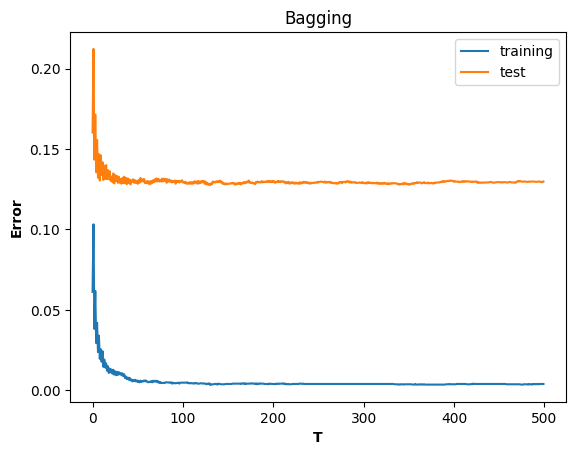

In [14]:
x = np.arange(len(report['test']))
plt.plot(x, report['training'], label='training')
plt.plot(x, report['test'], label='test')

plt.title('Bagging')
plt.xlabel('T', fontweight ='bold')
plt.ylabel('Error', fontweight ='bold')
plt.legend()
plt.show()

In [13]:
with open('./bagging1.report', 'wb') as f:
    pickle.dump(report, f)

In [15]:
min(report['test'])

0.12760000000000005

In [16]:
report['test'].index(min(report['test']))

130